Importing the dependencies



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the boston house price dataset

In [46]:
house_price_dataset = pd.read_csv("HousingData.csv")

In [47]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [48]:
house_price_dataset.shape

(506, 14)

In [49]:
house_price_dataset.rename(columns={house_price_dataset.columns[13]: 'price'}, inplace=True)
 #renaming the last column

In [50]:
#check for missing values
house_price_dataset.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [51]:
#statistical measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various feastures in the dataset

1. positive Correlation - one feature increases so other one also increases.
2. negative Correlation - one feature increases so other one decreases.

In [52]:
correlation = house_price_dataset.corr()

<Axes: >

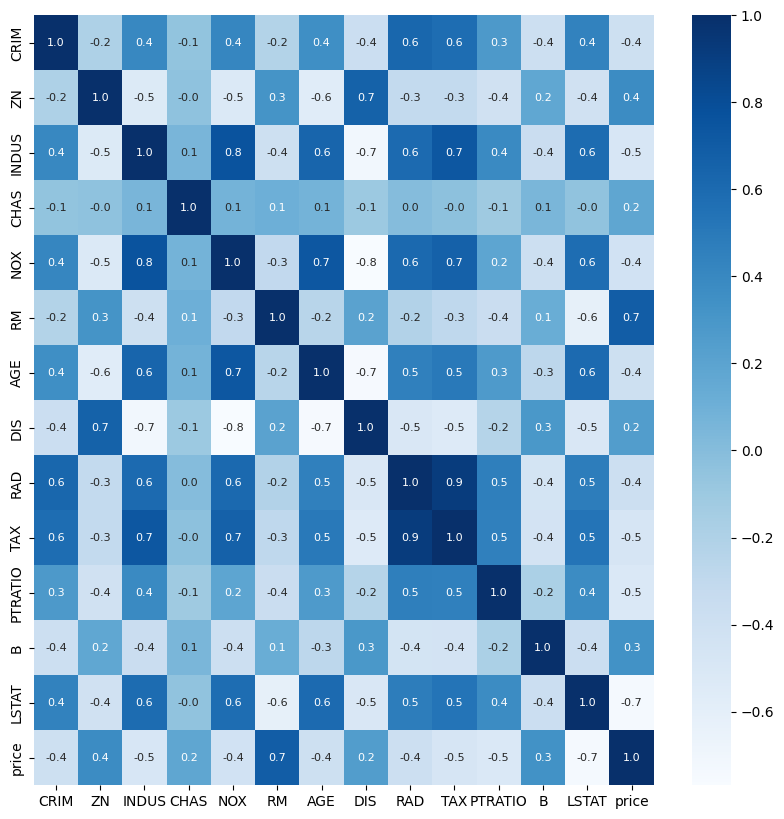

In [53]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True, fmt = '.1f',annot = True,annot_kws = {'size':8},cmap = 'Blues')
#cbar means color bar , so true means it will be shown
#fmt means ki till how many decimals u need value
#annot means annotation chahiye ki ni (annotations are jo box ke andar digits likhe hai)
#annot_kws means the size of these annotations will be increased

Splitting the data and target

In [54]:
X = house_price_dataset.drop(['price'],axis = 1)

In [55]:
 Y = house_price_dataset['price']

Splitting the data into Training data and Test data

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = 2)

In [61]:
print(X.shape,X_train.shape,Y_train.shape)

(506, 13) (404, 13) (404,)


Model Training

XGBoost Regressor

In [62]:
#loading the model
model = XGBRegressor()

In [63]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction of training data

In [65]:
  #accuray for prediction on training data
  training_data_prediction = model.predict(X_train)

In [66]:
training_data_prediction

array([23.10556  , 20.995161 , 20.098679 , 34.694107 , 13.90913  ,
       13.503013 , 21.991356 , 15.19639  , 10.901248 , 22.69718  ,
       13.810051 ,  5.5994563, 29.803614 , 49.997128 , 34.89243  ,
       20.59913  , 23.397764 , 19.208693 , 32.69327  , 19.599798 ,
       26.990992 ,  8.401674 , 46.004715 , 21.697937 , 27.07413  ,
       19.372515 , 19.290953 , 24.80479  , 22.600445 , 31.683664 ,
       18.527308 ,  8.700464 , 17.40693  , 23.698957 , 13.300282 ,
       10.498531 , 12.704187 , 25.011072 , 19.698133 , 14.903836 ,
       24.199064 , 24.99671  , 14.903162 , 16.99955  , 15.596944 ,
       12.703466 , 24.515984 , 15.002214 , 49.998177 , 17.514849 ,
       21.200884 , 32.014084 , 15.601433 , 22.900557 , 19.30743  ,
       18.713701 , 23.301996 , 37.197086 , 30.099365 , 33.101482 ,
       21.000624 , 49.986263 , 13.402558 ,  5.005925 , 16.504436 ,
        8.400528 , 28.684137 , 19.482313 , 20.600052 , 45.402576 ,
       39.801155 , 33.39976  , 19.80939  , 33.399323 , 25.2878

we compare the accuracy we compare the training_data_prediction and y_train , to calculate the error

In [67]:
#R squared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)

In [68]:
#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

In [70]:
print("R squared error: ",score_1) # value should be around 1 , if it is around 10 so our model is not performing well

R squared error:  0.9999987142043713


In [71]:
print("Mean Absolute Error: ",score_2)

Mean Absolute Error:  0.007200302700005027


Visualizing the actual Prices and predicted prices for training data

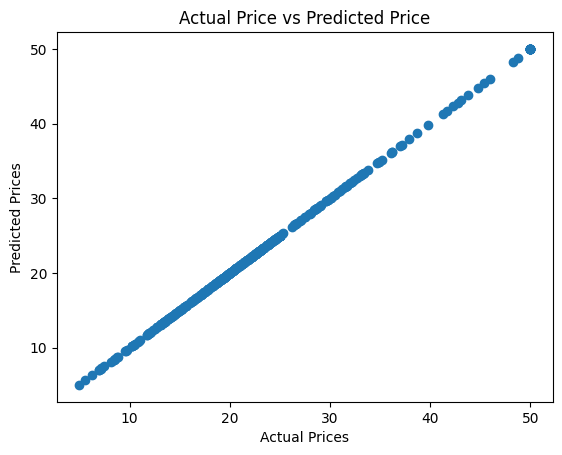

In [79]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [72]:
test_data_prediction = model.predict(X_test)

In [73]:
test_data_prediction

array([20.383139 , 22.656385 , 30.826708 , 27.878897 ,  8.805948 ,
       13.600548 , 26.303036 , 30.727125 , 17.798553 , 20.170778 ,
       26.527412 , 24.576565 , 20.54291  , 21.095081 , 26.6565   ,
       22.502972 , 18.869703 ,  9.9264145,  9.314949 , 14.770702 ,
       22.454021 , 19.507164 , 34.395382 , 17.945509 , 15.361209 ,
       18.913652 , 45.609146 , 33.094124 , 33.8779   , 19.872215 ,
       15.981635 , 19.835049 , 30.112732 , 23.200474 ,  9.11869  ,
       17.311817 ,  9.549464 , 21.379145 , 21.905293 , 21.554203 ,
       25.519806 , 13.072706 , 28.900301 ,  7.2484136, 21.321661 ,
       14.178026 , 34.397423 , 16.688627 , 30.466244 , 16.124792 ,
       31.119566 , 28.480316 ,  6.387809 , 32.930214 , 24.125877 ,
       19.955687 , 18.902025 , 19.524641 , 16.026045 , 22.490847 ,
       20.169174 , 19.523516 , 18.003931 , 28.294247 , 31.94455  ,
       25.29936  , 49.33432  , 30.476421 ,  9.341851 , 23.330816 ,
       15.17611  ,  7.1256075, 16.744974 , 18.707571 , 26.9436

In [75]:
#R squared error
scoretest_1 = metrics.r2_score(Y_test,test_data_prediction)

#Mean Absolute error
scoretest_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

In [76]:
print("R squared error for test data: ",scoretest_1)
print("Mean Absolute error for test data:",scoretest_2)

R squared error for test data:  0.8948011220086851
Mean Absolute error for test data: 2.087377268660302


Visualizing the actual prices and predicted prices of test data

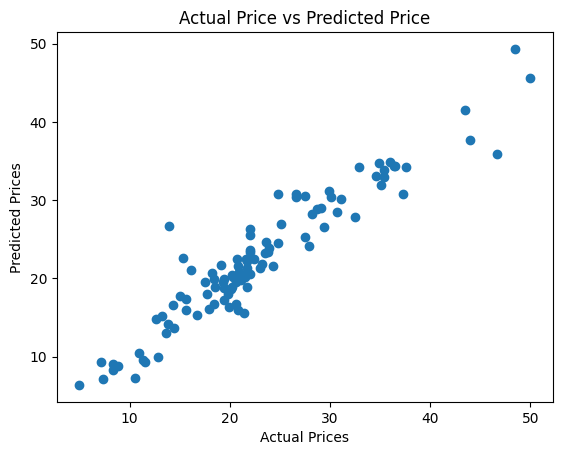

In [80]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()